In [0]:
import numpy as np
np.random.seed(123)

In [2]:
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential

# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D



# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [0]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=16ZYT16SlqdFGHc5-oxmteqDUpUZVgRsN"
df = pd.read_csv(url, header=0,encoding='ISO-8859-1')
#https://drive.google.com/file/d/1Osw4OJjFm1m4ci0z3yruvpJDv8Y8GnL9/view?usp=sharing
#https://drive.google.com/file/d/16ZYT16SlqdFGHc5-oxmteqDUpUZVgRsN/view?usp=sharing

In [4]:
df.shape

(14640, 15)

In [0]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

X = df

X["text"] = X["text"].apply(lambda x: BeautifulSoup(x, "lxml").get_text())
X["text"] = X["text"].apply(lambda x: x.lower())
X["text"] = X["text"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
X["text"] = X["text"].apply(lambda x: re.sub("\s+", " ", x))

X = X[X["airline_sentiment_confidence"]>0.5]

y = X["airline_sentiment"]
X = X["text"]

stopwords = stopwords.words('english')
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer(stop_words=stopwords)

X = vectorizer.fit_transform(X)
model = RandomForestClassifier(n_estimators=5, n_jobs=-1, class_weight='balanced', random_state=0)
# model = SVC()

print(cross_val_score(model, X, y, cv=3)) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[0.75572678 0.739221   0.74047074]


In [7]:
df.airline_sentiment

0        positive
1        positive
2        positive
3        negative
4        negative
5        negative
6        positive
7        positive
8        positive
9        positive
10       positive
11       positive
12       positive
13       positive
14       positive
15       negative
16       positive
17       negative
18       positive
19       positive
20       negative
21       positive
22       positive
23       positive
24       negative
25       negative
26       negative
27       positive
28       negative
29       positive
           ...   
14610    negative
14611    positive
14612    negative
14613    negative
14614    negative
14615    negative
14616    negative
14617    positive
14618    negative
14619    positive
14620    negative
14621    negative
14622    negative
14623    positive
14624    negative
14625    positive
14626    negative
14627    negative
14628    positive
14629    negative
14630    positive
14631    negative
14632    positive
14633    negative
14634    n

In [8]:
##preprocessing
X = df.text
Y = df.airline_sentiment

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = to_categorical(Y)

# Y = Y.reshape(-1, 1)
Y[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
df.airline_sentiment.head(5)

0    positive
1    positive
2    positive
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,shuffle=False)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

# max_words = 1000
# max_len = 150
max_words, max_len

(12628, 176)

In [11]:
Y_test.shape

(2196, 2)

In [12]:
Y_train.shape

(12444, 2)

In [0]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [0]:
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [15]:
class_weight = get_weight(Y_train.flatten())
class_weight

array([1., 1.])

In [0]:
def get_rnn_model(num_class=2):
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(LSTM(256))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='sigmoid'))
    
    model.summary()
    return model
  
def get_cnn_model(num_class=2):   
  model = Sequential()

  model.add(Embedding(max_words, 100, input_length=max_len))

  model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
  model.add(GlobalMaxPooling1D())

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(2048, activation='relu'))

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(2, activation='sigmoid'))

  model.summary()
  return model

In [0]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['acc']
    y2 = history.history['val_acc']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [18]:
num_class = 2
model1 = get_rnn_model(num_class=num_class)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 176, 100)          1262800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)      

In [0]:
#loss = 'categorical_crossentropy'
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [20]:
#####RNN
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 10
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")
history1 = model1.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    #class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-05-01 17:10:30


Compliling Model ...

Trainning Model ...

Instructions for updating:
Use tf.cast instead.
Train on 9955 samples, validate on 2489 samples
Epoch 1/10
9955/9955 [==============================] - 143s 14ms/step - loss: 0.7752 - acc: 0.6385 - val_loss: 0.8619 - val_acc: 0.7421
Epoch 2/10
9955/9955 [==============================] - 141s 14ms/step - loss: 0.3898 - acc: 0.8377 - val_loss: 0.5938 - val_acc: 0.8023
Epoch 3/10
9955/9955 [==============================] - 141s 14ms/step - loss: 0.2430 - acc: 0.9093 - val_loss: 0.4193 - val_acc: 0.8453
Epoch 4/10
9955/9955 [==============================] - 141s 14ms/step - loss: 0.1782 - acc: 0.9328 - val_loss: 0.5886 - val_acc: 0.8172
Epoch 5/10
9955/9955 [==============================] - 140s 14ms/step - loss: 0.1359 - acc: 0.9537 - val_loss: 0.7081 - val_acc: 0.7782
Epoch 6/10
9955/9955 [==============================] - 141s 14ms/step - loss: 0.1019 - acc: 0.9643 - val_loss: 0.6362 - val_acc: 

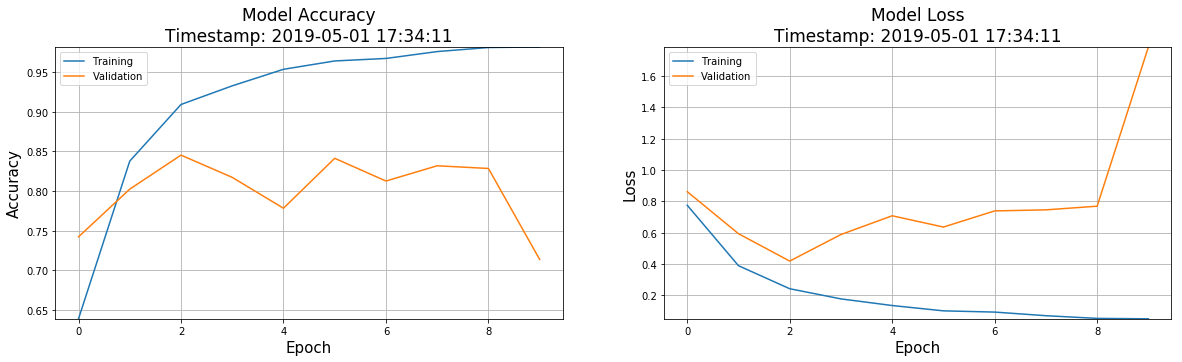

[0.7751760555834462,
 0.3898382889990948,
 0.24298733941937498,
 0.1781544978881469,
 0.13586173607649246,
 0.10193393449876728,
 0.09406833481034221,
 0.07098363386004011,
 0.053873369830044475,
 0.05124836621468298]

In [21]:
plot_performance(history=history1)
history1.history["loss"]

In [22]:
##cnn
num_class = 2
model2 = get_cnn_model(num_class=num_class)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 176, 100)          1262800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 174, 1024)         308224    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              2099200   
__________

In [23]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 10
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    #class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-05-01 17:34:12


Compliling Model ...

Trainning Model ...

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 9955 samples, validate on 2489 samples
Epoch 1/10
9955/9955 [==============================] - 93s 9ms/step - loss: 0.8138 - acc: 0.6527 - val_loss: 0.3991 - val_acc: 0.8156
Epoch 2/10
9955/9955 [==============================] - 91s 9ms/step - loss: 0.5095 - acc: 0.7784 - val_loss: 0.3993 - val_acc: 0.8202
Epoch 3/10
9955/9955 [==============================] - 91s 9ms/step - loss: 0.3567 - acc: 0.8498 - val_loss: 0.4176 - val_acc: 0.8140
Epoch 4/10
9955/9955 [==============================] - 91s 9ms/step - loss: 0.2571 - acc: 0.8981 - val_loss: 0.4178 - val_acc: 0.8327
Epoch 5/10
9955/9955 [==============================] - 91s 9ms/step - loss: 0.1772 - acc: 0.9334 - val_loss: 0.4432 - val_acc: 0.8481
Epoch 6/10
9955/9955 [==============================] - 91s 9ms/step - loss: 0.1332 - acc: 0.9471 - val_loss: 

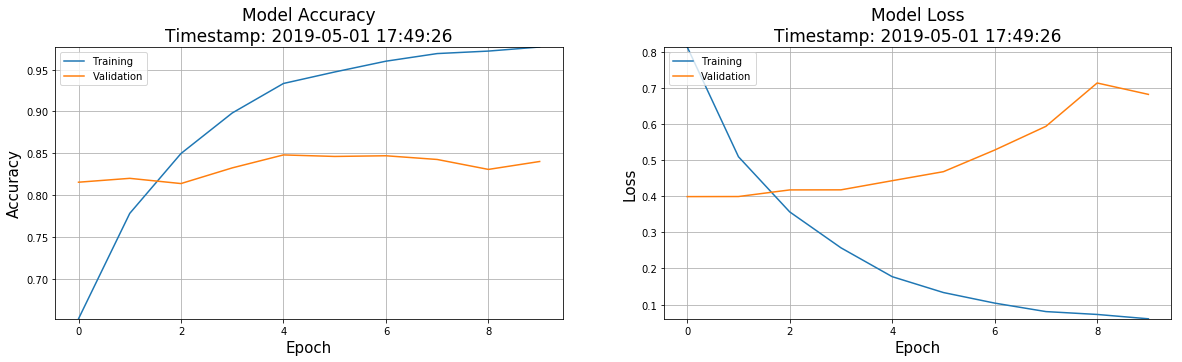

In [24]:
plot_performance(history=history2)

In [25]:
##prediction
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy1 = model1.evaluate(test_X_seq, Y_test)
accuracy2 = model2.evaluate(test_X_seq, Y_test)

2196/2196 [==============================] - 5s 2ms/step


In [26]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of CNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 70.97%
Loss: 1.910


Model Performance of CNN (Test Accuracy):
Accuracy: 81.03%
Loss: 0.839



In [27]:
ypreds1 = model1.predict_classes(test_X_seq, verbose=1)
ypreds2 = model2.predict_classes(test_X_seq, verbose=1)

2196/2196 [==============================] - 6s 3ms/step


In [0]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

In [29]:
result = pd.DataFrame({'model': 'RNN', 'score': accuracy1[1]*100}, index=[-1])
row2 = pd.DataFrame({'model': 'CNN', 'score': accuracy2[1]*100}, index=[-1])
result = pd.concat([row2, result.ix[:]]).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


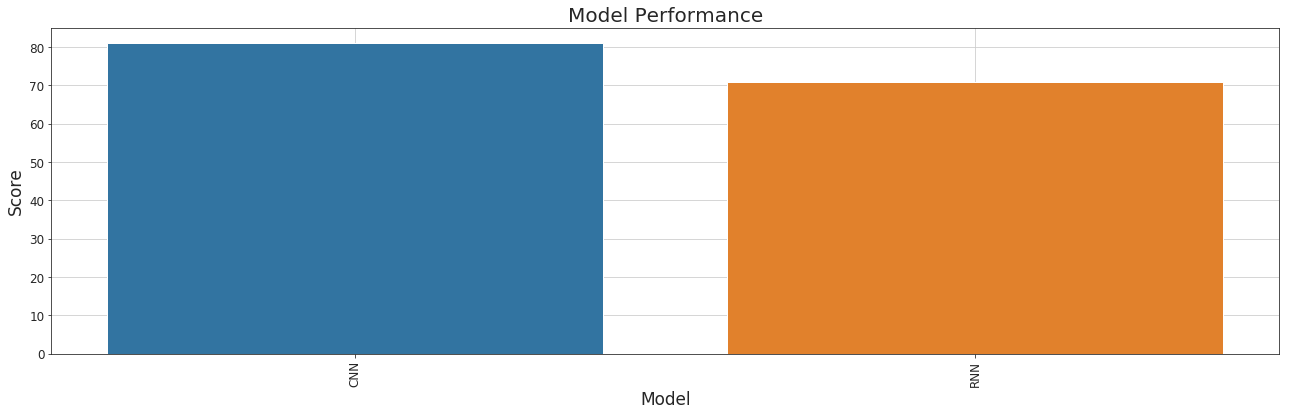

  model      score
0   CNN  81.033698
1   RNN  70.969945


In [30]:
plot_model_performace(result)

In [31]:
test_cm = df.airline_sentiment[12444:]
test_cm=test_cm.replace("negative",0)
test_cm=test_cm.replace("positive",1)
test_cm[0:5]

12444    1
12445    0
12446    0
12447    1
12448    0
Name: airline_sentiment, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix

labels = [0, 1]
cm = confusion_matrix(test_cm, ypreds1,labels)
print(cm)

[[1060  577]
 [  62  497]]


In [33]:
print("Recall for RNN:",cm[0][0]/(cm[0][0]+cm[1][0]))

Recall for RNN: 0.9447415329768271


In [34]:
from sklearn.metrics import confusion_matrix

labels = [0, 1]
cm1 = confusion_matrix(test_cm, ypreds2,labels)
print(cm1)
#plot_confusion_matrix(Y_test, ypreds2, title="CNN")

[[1346  291]
 [ 126  433]]


In [35]:
print("Recall for CNN:",cm1[0][0]/(cm1[0][0]+cm1[1][0]))

Recall for CNN: 0.9144021739130435
